In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from utils import TMM_env
import matplotlib
%matplotlib inline

# font = {'family' : 'monospace',
#         'weight' : 'bold',
#         'size'   : 'larger'}
matplotlib.rcParams['font.size'] = 12


import torch
from PPO_experiment import GRU_RNN
from utils import get_structure

def visualize_progress(filename, batch_size=200, total_iter=1e6, alpha=0.6):
    # x = np.arange(batch_size, total_iter+1, 200)
    res = pkl.load(open(filename, 'rb'))
    plt.plot(res['rewards'], alpha=alpha)
    plt.xlabel('# of samples (K)')
    plt.ylabel('Average reward')
    plt.ylim([0.5, 1])
    plt.grid('on', linestyle='--')

In [2]:
# res_random = pkl.load(open('res_True.pkl' ,'rb'))
# res_rl = pkl.load(open('res_False.pkl' ,'rb'))
# res_rl_GRU = pkl.load(open('res_False_GRU.pkl' ,'rb'))

# plt.figure()
# plt.plot(res_random['best_As'])
# plt.plot(res_rl['best_As'])
# plt.plot(res_rl_GRU['best_As'])
# plt.legend(['Random', 'RL', 'RL-GRU'])
# plt.ylabel('Highest abosorption')
# plt.xlabel('Number of iterations')
# plt.ylim([0,1])

# plt.figure()
# plt.plot(res_random['As'])
# plt.plot(res_rl['As'])
# plt.plot(res_rl_GRU['As'])
# plt.legend(['Random', 'RL', 'RL-GRU'])
# plt.ylabel('Average absorption per batch')
# plt.xlabel('Number of iterations')
# plt.ylim([0,1])

# print(res_random['mat'], res_random['thickness'], res_random['best_As'][-1], np.max(res_random['As']))
# print(res_rl['mat'], res_rl['thickness'], res_rl['best_As'][-1], np.max(res_rl['As']))
# print(res_rl_GRU['mat'], res_rl_GRU['thickness'], res_rl_GRU['best_As'][-1], np.max(res_rl_GRU['As']))

# REINFORCE

0.8399982648914418 0.9751825113494584 ['HfO2', 'MgF2', 'Cr', 'MgF2', 'Al', 'Ge', 'SiO2', 'Si3N4'] [inf, 20, 50, 12, 100, 100, 20, 100, 20, inf]
0.908235668513307 0.9782283933245246 ['MgF2', 'SiC', 'TiO2', 'SiC', 'Ge', 'Cr'] [inf, 100, 10, 10, 10, 10, 410, inf]
0.9062246942125951 0.971532241063306 ['SiO2', 'Cr', 'MgF2', 'Cr'] [inf, 100, 10, 100, 213, inf]
0.8678653769635595 0.9547230378150365 ['MgF2', 'HfO2', 'Ge', 'MgF2', 'Ge', 'Cr'] [inf, 50, 50, 17, 1, 1, 152, inf]
0.2571686345151259 0.9674540725480546 ['SiO2', 'MgF2', 'SiO2', 'Si3N4', 'Ge', 'SiO2', 'Cr', 'TiO2', 'HfO2', 'Cr'] [inf, 20, 10, 50, 5, 10, 20, 20, 20, 2, 100, inf]


/home/wanghaozhu/.conda/envs/RL/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


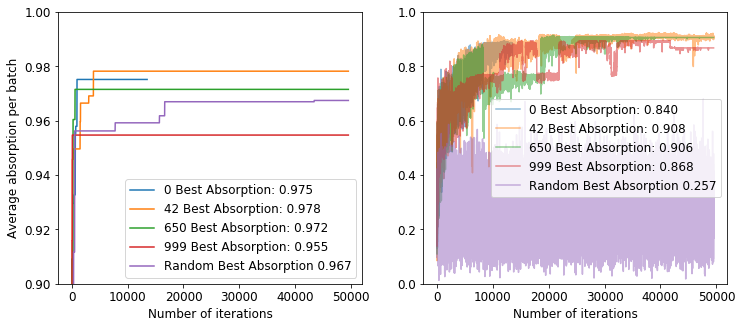

In [3]:
res_random = pkl.load(open('res_True_RNN_0.pkl' ,'rb'))

# plot results from different seeds
seeds = [0, 42, 650, 999]
fig, ax = plt.subplots(1,2, figsize=(12,5))
As = []
As_final = []
for s in seeds:
    res_rl_GRU = pkl.load(open('res_False_GRU_{}.pkl'.format(s) ,'rb'))
    ax[0].plot(res_rl_GRU['best_As'])
    ax[1].plot(res_rl_GRU['As'], alpha=0.5)
    print(res_rl_GRU['As'][-1], res_rl_GRU['best_As'][-1], res_rl_GRU['mat'], res_rl_GRU['thickness'])
    As.append(res_rl_GRU['best_As'][-1])
    As_final.append(res_rl_GRU['As'][-1])

print(res_random['As'][-1], res_random['best_As'][-1], res_random['mat'], res_random['thickness'])
ax[0].plot(res_random['best_As'])
ax[1].plot(res_random['As'], alpha=0.5)

ax[0].set_ylabel('Average absorption per batch')
ax[0].set_xlabel('Number of iterations')
ax[1].set_xlabel('Number of iterations')
ax[0].set_ylim([0.9,1])
ax[1].set_ylim([0,1])
ax[0].legend([str(item) + ' Best Absorption: {:.3f}'.format(a) for a, item in zip(As, seeds)] + ['Random Best Absorption {:.3f}'.format(res_random['best_As'][-1])])
ax[1].legend([str(item) + ' Best Absorption: {:.3f}'.format(a) for a, item in zip(As_final, seeds)] + ['Random Best Absorption {:.3f}'.format(res_random['As'][-1])])

In [28]:
materials = ['Ag', 'Al', 'Cr', 'Ge', 'Al2O3', 'HfO2', 'MgF2', 'Si3N4', 'SiC', 'SiO2', 'TiO2']
env = TMM_env(materials)

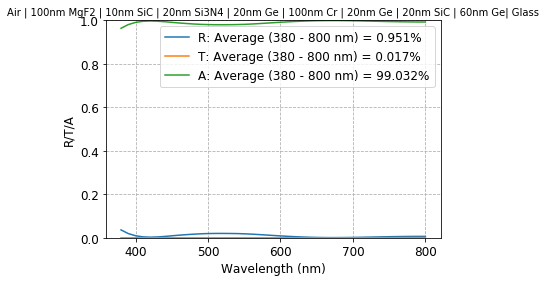

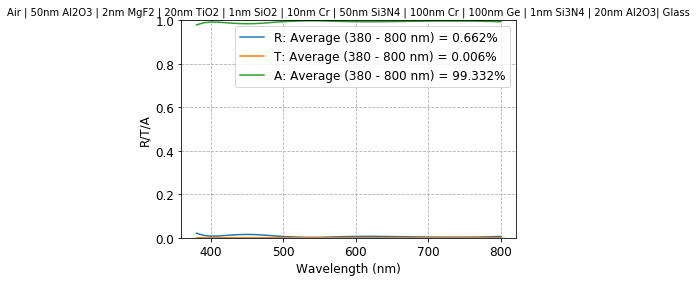

In [5]:
R, T, A = env.spectrum(['MgF2', 'SiC', 'Si3N4', 'Ge', 'Cr', 'Ge', 'SiC', 'Ge'], [np.inf, 100, 10, 20, 20, 100, 20, 20, 60, np.inf], 0, True, True)
R, T, A = env.spectrum(['Al2O3', 'MgF2', 'TiO2', 'SiO2', 'Cr', 'Si3N4', 'Cr', 'Ge', 'Si3N4', 'Al2O3'], [np.inf, 50, 2, 20, 1, 10, 50, 100, 100, 1, 20, np.inf], 0, True, True)

# PPO results

In [4]:
res_rl_GRU = pkl.load(open('res_False_GRU_{}.pkl'.format(650) ,'rb'))

In [24]:
As = np.array(res_rl_GRU['As'])
As = As[: -(len(As) % 25)].reshape(-1, 25).mean(axis=1)

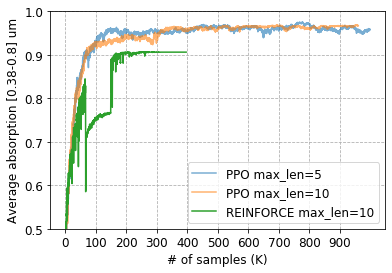

In [25]:
visualize_progress('ppo_res_5.pkl')
visualize_progress('ppo_res_10.pkl')
plt.plot(As)
plt.xticks(np.arange(0, 5000, 500), (np.arange(0, 5000, 500) / 5).astype(int))
plt.ylabel('Average absorption [0.38-0.8] um')
plt.legend(['PPO max_len=5', 'PPO max_len=10', 'REINFORCE max_len=10'])
plt.show()

In [26]:
materials = ['Ag', 'Al', 'Cr', 'Ge', 'Al2O3',
             'HfO2', 'MgF2', 'Si3N4', 'SiC', 'SiO2', 'TiO2']
ds = [1, 2, 5, 10, 20, 50, 100]
n_categories = len(materials) + 1
input_size = len(ds) 
hidden_size = 128
DEVICE = 0
policy = GRU_RNN(input_size, hidden_size, n_categories).to(DEVICE)
max_len = 10
policy.load_state_dict(torch.load('policy_{}.pth'.format(max_len)))

<All keys matched successfully>

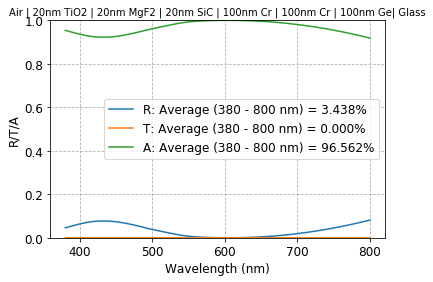

([tensor([-1.4392], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-0.0036], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-1.5497e-06], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-0.0017], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-1.1921e-07], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-1.9193e-05], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-2.0266e-06], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-5.1260e-06], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-1.0729e-06], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-9.5367e-07], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-3.3975e-06], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-1.7881e-06], device='cuda:0', grad_fn=<SqueezeBackward1>),
  tensor([-1.1921e-07], device='cuda:0', grad_fn=<SqueezeBackward1>)],
 tensor([0.2371], device='cuda:0', grad_fn=<ExpBackward>))

In [41]:
categories, values, logprobs = policy.sample(max_len)
structure, thickness = get_structure(categories, values, materials, ds)
R, T, A = env.spectrum(structure, thickness, 0, True, True)
logprobs, torch.exp(logprobs[0])

Text(0, 0.5, 'Average absorption [0.38-0.8] um')

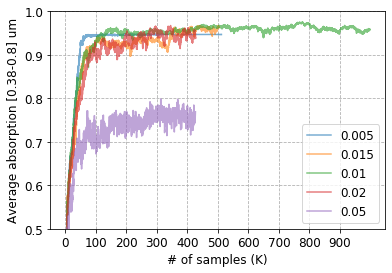

In [5]:
# exploring the effect of beta
plt.figure()
visualize_progress('ppo_res_5_0.005.pkl')
visualize_progress('ppo_res_5_0.015.pkl')
visualize_progress('ppo_res_5.pkl')
visualize_progress('ppo_res_5_0.02.pkl')
visualize_progress('ppo_res_5_0.05.pkl')
plt.xticks(np.arange(0, 5000, 500), (np.arange(0, 5000, 500) / 5).astype(int))
plt.legend([0.005, 0.015, 0.01, 0.02, 0.05])
plt.ylim([0.5,1])
plt.ylabel('Average absorption [0.38-0.8] um')

Text(0, 0.5, 'Average absorption [0.38-0.8] um')

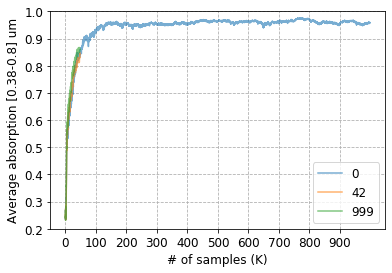

In [13]:
# random seed
plt.figure()
visualize_progress('ppo_res_5.pkl')
visualize_progress('ppo_res_5_0.01_42.pkl')
visualize_progress('ppo_res_5_0.01_999.pkl')
plt.xticks(np.arange(0, 5000, 500), (np.arange(0, 5000, 500) / 5).astype(int))
plt.legend([0, 42, 999])
plt.ylim([0.2,1])
plt.ylabel('Average absorption [0.38-0.8] um')

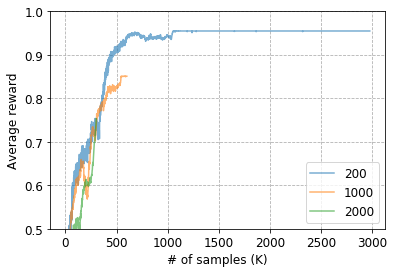

In [56]:
plt.figure()
visualize_progress('ppo_res_5_0.01_0_200_0.3.pkl')
visualize_progress('ppo_res_5_0.01_0_1000_0.3.pkl')
visualize_progress('ppo_res_5_0.01_0_2000_0.3.pkl')
plt.legend([200, 1000, 2000])

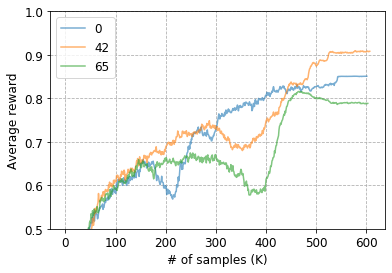

In [55]:
plt.figure()
visualize_progress('ppo_res_5_0.01_0_1000_0.3.pkl')
visualize_progress('ppo_res_5_0.01_42_1000_0.3.pkl')
visualize_progress('ppo_res_5_0.01_65_1000_0.3.pkl')
plt.legend([0, 42, 65])

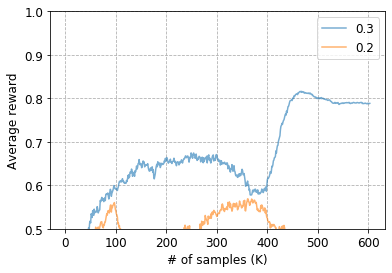

In [54]:
plt.figure()
visualize_progress('ppo_res_5_0.01_65_1000_0.3.pkl')
visualize_progress('ppo_res_5_0.01_65_1000_0.2.pkl')
plt.legend([0.3, 0.2])

FileNotFoundError: [Errno 2] No such file or directory: './results/ppo_res_10.pkl'

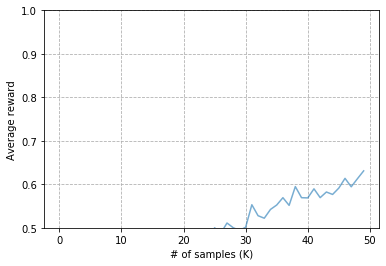

In [46]:
visualize_progress('./results/ppo_continuous_10_0.01_42_200_0.3.pkl')
visualize_progress('./results/ppo_res_10.pkl')
plt.legend(['continuous action', 'discrete action'])

(0, 1)

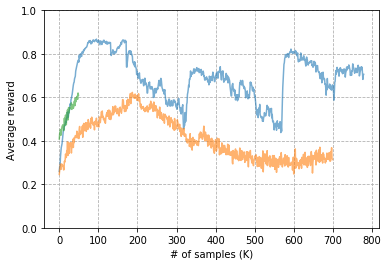

In [45]:
visualize_progress('./results/ppo_continuous_5_0.01_42_1000_0.3.pkl')
visualize_progress('./results/ppo_continuous_5_0.01_42_200_0.2.pkl')
visualize_progress('./results/ppo_continuous_5_0.0_42_200_0.3.pkl')
plt.ylim([0, 1])

(0, 1)

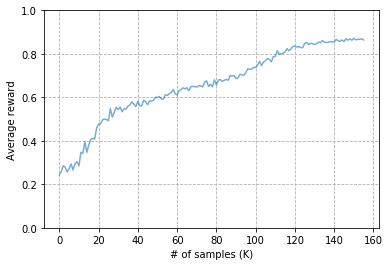

In [11]:
visualize_progress('./results/ppo_continuous_5_0.0_42_256_0.3.pkl')
plt.ylim([0, 1])

In [3]:
materials = ['Ag', 'Al', 'Cr', 'Ge', 'Al2O3', 'HfO2', 'MgF2', 'Si3N4', 'SiO2', 'TiO2']
env = TMM_env(materials)
layers = ['SiO2', 'Ge', 'HfO2', 'Cr'] 
thicknesses = [np.inf, 68, 5, 29, 78, np.inf]
env.spectrum(layers, thicknesses)

(array([0.00438039, 0.00473689, 0.00558301, 0.00667593, 0.00762574,
        0.0086574 , 0.00973171, 0.01072466, 0.01157079, 0.0121585 ,
        0.01238747, 0.01231325, 0.01217644, 0.01198496, 0.01150915,
        0.01066044, 0.00957713, 0.00872048, 0.0081435 , 0.00782065,
        0.00755466, 0.00731722, 0.00711787, 0.00694179, 0.00678404,
        0.00667141, 0.0066323 , 0.00665091, 0.00672934, 0.00689291,
        0.00717049, 0.00758313, 0.00814171, 0.00887282, 0.00980227,
        0.01095278, 0.01237846, 0.01414079, 0.01626877, 0.0187896 ,
        0.0217282 , 0.02510518, 0.02887274]),
 array([0.00050361, 0.00051633, 0.00052063, 0.00052363, 0.00052551,
        0.00053173, 0.00054985, 0.00057285, 0.00059068, 0.00061379,
        0.00065851, 0.00072462, 0.00080386, 0.00089717, 0.00100554,
        0.00113067, 0.00127639, 0.00145416, 0.00167257, 0.00193773,
        0.00222921, 0.00254053, 0.00286961, 0.00321585, 0.00357855,
        0.00395549, 0.0043445 , 0.00475102, 0.00517749, 0.0056225 ,
  

In [8]:
import gym 
import gym_tmm0
from utils import cal_reward
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from utils import TMM_env
import matplotlib
%matplotlib inline
materials = ['Ag', 'Al', 'Cr', 'Ge', 'Al2O3', 'HfO2', 'MgF2', 'Si3N4', 'SiO2', 'TiO2']
start_lambda, end_lambda = 0.38, 0.80
wavelength = np.arange(start_lambda, end_lambda+0.005, 0.02)
simulator = TMM_env(materials, wavelength=wavelength)
env = gym.make('tmm0-v0')

target = {'A': np.ones_like(wavelength)}

(array([0.04376431, 0.01826912, 0.00778081, 0.00490117, 0.00431633,
        0.00369523, 0.00262871, 0.00134756, 0.00056053, 0.00097837,
        0.00303634, 0.00660047, 0.0108889 , 0.0146328 , 0.01680397,
        0.01643931, 0.01343843, 0.00879854, 0.0045172 , 0.00368198,
        0.00920357, 0.02311034]),
 array([4.73669148e-07, 8.01784514e-07, 1.24984062e-06, 1.91431062e-06,
        2.89513644e-06, 4.30913905e-06, 6.22650742e-06, 8.70661298e-06,
        1.18035255e-05, 1.56309196e-05, 2.03041007e-05, 2.59468828e-05,
        3.26888326e-05, 4.07307609e-05, 5.07077102e-05, 6.32451071e-05,
        7.87386439e-05, 9.78198389e-05, 1.22322928e-04, 1.54389332e-04,
        2.09998912e-04, 3.03355131e-04]),
 array([0.95623522, 0.98173008, 0.99221794, 0.99509692, 0.99568078,
        0.99630046, 0.99736507, 0.99864373, 0.99942767, 0.999006  ,
        0.99694335, 0.99337358, 0.98907841, 0.98532647, 0.98314533,
        0.98349745, 0.98648283, 0.99110364, 0.99536047, 0.99616363,
        0.99058643, 

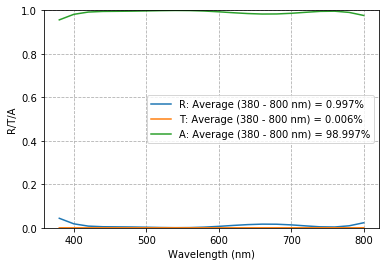

In [9]:
layers = ['Al2O3', 'SiC', 'Ge', 'SiC', 'Al'] 
thicknesses = [np.inf, 69, 25, 77, 21, 49, np.inf]
simulator.spectrum(layers, thicknesses, plot=True)

In [30]:
env.config(simulator, cal_reward, target)

0.0
0.329914860802451
0.0037760443125819387
0.6535231834556462


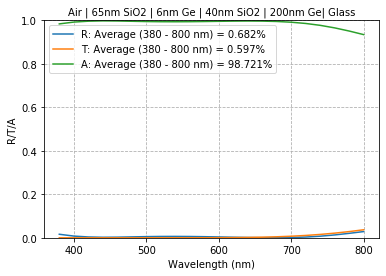

In [31]:
env.reset()
layers = ['SiO2', 'Ge', 'SiO2', 'Ge', 'done']
thickensses = [65, 6, 40, 200]
for l, d in zip(layers, thickensses):
    obs, r, _, _ = env.step((l, d))
    print(r)
env.render()

In [1]:
import numpy as np 

def softmax(x):

    return np.exp(x) / np.sum(np.exp(x))

In [11]:
x = [-98.5, -0.1, -1.0, -0.5] 
softmax(x)

array([8.87175514e-44, 4.81489218e-01, 1.95758907e-01, 3.22751875e-01])